### Моделирование случайного блуждания

In [31]:
import numpy as np

import matplotlib.pyplot as plt

In [32]:
# случайный массив (4,4) с нормальным распределением:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.3070351 ,  0.49950592,  1.07931588,  1.15248237],
       [-1.03045417, -0.21680052,  0.61721509,  0.77885398],
       [ 0.85056266,  0.23904233,  0.87902896, -1.37044528],
       [-0.54399218, -0.79087052,  0.20413975, -0.53660372]])

In [33]:
# задаем начальное значение генератора псевдослучайных чисел:
np.random.seed(12345)

Distributions: https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

[Случайное блуждание](https://ru.wikipedia.org/wiki/%D0%A1%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B5_%D0%B1%D0%BB%D1%83%D0%B6%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5)

In [34]:
import random
# находимся в точке 0
position = 0
walk = [position]
# проходим 1000 шагов
steps = 1000
for i in range(steps):
    # выбираем, куда двигаться случайным образом:
    step = 1 if random.randint(0, 1) else -1 
    position += step
    walk.append(position)

In [35]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

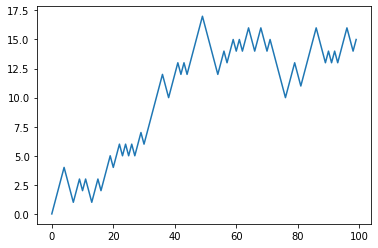

In [36]:
plt.plot(walk[:100])

In [37]:
# эту задачу можно решить с помощью numpy
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [38]:
# минимальное значение на траектории блуждания
walk.min()

-3

In [39]:
# максимальное значение на траектории блуждания
walk.max()

31

In [40]:
# Момент первого пересечения - шаг, на котором траектория случайного блуждания впервые достигнет
# заданного значения
# Сколько времени потребуется на то, чтобы удалиться от начала на 10 единиц в любом направлении. 
(np.abs(walk) >= 10).argmax()

37

### Моделирование нескольких случайных блужданий

In [41]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [42]:
walks.max()

138

In [43]:
walks.min()

-133

In [44]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [45]:
hits30.sum() # Number that hit 30 or -30

3410

In [46]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

**Задание 1**: постройте график нескольких случайных блужданий. 

**Задание 2**: рассмотрите другие распределения шагов (`normal`). 

In [47]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))